<a href="https://colab.research.google.com/github/jatinmic1/PROJECTS-PUBLIC/blob/rossmann-sales-prediction/JATIN_AGARWAL_CAP_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>THIS PROJECT HAS BEEN COMPLETED INDIVIDUALLY BY JATIN AGARWAL</h1>

GITHUB LINK:


# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
File_directory = '/content/drive/MyDrive/REGRESSION PROJECT/csv files/'
rossmann_df = pd.read_csv(File_directory + 'Rossmann Stores Data.csv')
store_df = pd.read_csv(File_directory + 'store.csv')

/usr/local/lib/python3.9/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
rossmann_df.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
566684,1050,7,2014-02-09,0,0,0,0,0,0
175478,424,2,2015-02-24,6001,706,1,0,0,0
309567,314,2,2014-10-14,4272,523,1,0,0,1
140545,56,5,2015-03-27,7736,555,1,0,0,0
624891,162,3,2013-12-18,11518,665,1,1,0,0
519595,791,7,2014-03-23,0,0,0,0,0,0
439586,1062,2,2014-06-03,7907,631,1,1,0,0
528080,356,6,2014-03-15,5945,456,1,0,0,0
374795,42,2,2014-08-05,11768,1236,1,1,0,1
953900,246,2,2013-02-26,5985,835,1,0,0,0


In [ ]:
rossmann_df.shape

(1017209, 9)

I see here that the rossmann dataset consists of 1017209 values and 9 features

In [ ]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
store_df.sample(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
558,559,d,a,3910.0,11.0,2006.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
528,529,d,c,12920.0,9.0,2012.0,0,NaN,NaN,NaN
132,133,a,a,270.0,8.0,2013.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
953,954,a,a,390.0,2.0,2013.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
256,257,a,a,420.0,12.0,2012.0,0,NaN,NaN,NaN
110,111,d,c,7890.0,NaN,NaN,1,37.0,2009.0,"Jan,Apr,Jul,Oct"
608,609,a,a,2070.0,9.0,2007.0,0,NaN,NaN,NaN
562,563,a,a,700.0,3.0,2015.0,1,10.0,2014.0,"Jan,Apr,Jul,Oct"
782,783,d,c,15490.0,NaN,NaN,0,NaN,NaN,NaN
684,685,a,a,650.0,11.0,2013.0,1,37.0,2009.0,"Jan,Apr,Jul,Oct"


In [ ]:
store_df.shape

(1115, 10)

the store dataset consists of 1115 values and 10 features

## Looking for null values in Store csv file

In [ ]:
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are many null values in columns - **'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'**. Also **CompetitionDistance** has only 3 null values. I have to clean those data. 

### 1. CompetitionDistance

In [ ]:
store_df[pd.isnull(store_df.CompetitionDistance)]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


So, we can fill these three values with many ways such as 0 or mean or mode or median. We decided to fill with it Median.

In [ ]:
## code for replacing Nan values in CompetitionDistance with mode.
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)

### 2. 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear, Promointerval', 'Promo2sinceWeek' and 'Promo2sinceYear'

I observe from dataset that where the **Promo2** has value equals to zero there are Nan values for these columns. That means the store which do not wat promotion they have null values in promointerval , promo2sinceweek and so on.So for this purpose the best way to fill those features is to assign value equals to zero.

In [ ]:
## code for replacing Nan values with 0.

store_new = store_df.copy()

## Replacing Nan values with 0 in CompetitionOpenSinceMonth
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)

## Replacing Nan values with 0 in CompetitionOpenSinceYear
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceWeek
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)

## Replacing Nan values with 0 in Promo2SinceYear
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(0)

## Replacing Nan values with 0 in PromoInterval
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(0)

## Now checking Nan values
store_new.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

## Merge the Rossmann_df and Store_df csv by column 'Store' as in both csv Store column is common.

In [ ]:
final1 = pd.merge(rossmann_df, store_new, on='Store', how='left')
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [ ]:
final1.shape

(1017209, 18)

## Changing different dtypes to int type.

In [ ]:
# code for changing StateHoliday dtype from object to int.
final1.loc[final1['StateHoliday'] == '0', 'StateHoliday'] = 0
final1.loc[final1['StateHoliday'] == 'a', 'StateHoliday'] = 1
final1.loc[final1['StateHoliday'] == 'b', 'StateHoliday'] = 2
final1.loc[final1['StateHoliday'] == 'c', 'StateHoliday'] = 3
final1['StateHoliday'] = final1['StateHoliday'].astype(int, copy=False)

print('levels :', final1['StateHoliday'].unique(), '; data type :', final1['StateHoliday'].dtype)

levels : [0 1 2 3] ; data type : int64


In [ ]:
# code for changing Assortment dtype from object to int.
final1.loc[final1['Assortment'] == 'a', 'Assortment'] = 0
final1.loc[final1['Assortment'] == 'b', 'Assortment'] = 1
final1.loc[final1['Assortment'] == 'c', 'Assortment'] = 2
final1['Assortment'] = final1['Assortment'].astype(int, copy=False)

print('levels :', final1['Assortment'].unique(), '; data type :', final1['Assortment'].dtype)

levels : [0 2 1] ; data type : int64


In [ ]:
# code for changing StoreType dtype from object to int.
final1.loc[final1['StoreType'] == 'a', 'StoreType'] = 0
final1.loc[final1['StoreType'] == 'b', 'StoreType'] = 1
final1.loc[final1['StoreType'] == 'c', 'StoreType'] = 2
final1.loc[final1['StoreType'] == 'd', 'StoreType'] = 3
final1['StoreType'] = final1['StoreType'].astype(int, copy=False)

print('levels :', final1['StoreType'].unique(), '; data type :', final1['StoreType'].dtype)

levels : [2 0 3 1] ; data type : int64


In [ ]:
# code for changing format of date from object to datetime
final1['Date'] = pd.to_datetime(final1['Date'], format= '%Y-%m-%d')

In [ ]:
final1['CompetitionOpenSinceYear']= final1['CompetitionOpenSinceYear'].astype(int)
final1['Promo2SinceYear']= final1['Promo2SinceYear'].astype(int)

In [ ]:
final1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(final1['Date']).month

In [ ]:
final1['CompetitionDistance']= final1['CompetitionDistance'].astype(int)
final1['Promo2SinceWeek']= final1['Promo2SinceWeek'].astype(int)

## checking dtypes of columns

In [ ]:
final1.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                   int64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
dtype: object

# Exploratory Data Analysis

In [ ]:
final1.sample(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
572496,172,1,2014-02-03,9000,997,1,1,0,0,0,0,110,2,0,1,40,2014,"Jan,Apr,Jul,Oct"
765049,945,4,2013-08-15,4438,596,1,1,0,0,0,2,12480,8,2011,0,0,0,0
430561,957,3,2014-06-11,6527,762,1,0,0,0,3,2,1420,6,2012,0,0,0,0
396713,535,7,2014-07-13,0,0,0,0,0,0,0,0,3570,7,2007,0,0,0,0
894867,308,6,2013-04-20,7685,832,1,0,0,0,0,0,1070,4,2006,1,13,2010,"Jan,Apr,Jul,Oct"
776009,755,1,2013-08-05,8842,836,1,0,0,1,3,2,13130,8,2003,0,0,0,0
556587,988,2,2014-02-18,5141,741,1,1,0,0,0,0,30,2,2012,0,0,0,0
583269,910,6,2014-01-25,3383,367,1,0,0,0,3,2,12480,1,0,1,1,2013,"Jan,Apr,Jul,Oct"
676462,443,6,2013-11-02,4347,412,1,0,0,0,3,0,11400,11,2005,0,0,0,0
574825,271,6,2014-02-01,3134,285,1,0,0,0,0,0,420,2,0,1,14,2011,"Jan,Apr,Jul,Oct"


In [ ]:
final1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5422.02,5.85,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7706.92,3.33,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,20.00,1.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,710.00,3.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2325.00,6.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [ ]:
final1.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,0,1900,1,2014,1,31,2013,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,2,1880,1,2006,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,2,9260,1,0,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,2,870,1,0,0,0,0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,1,3,2,5350,1,0,1,22,2012,"Mar,Jun,Sept,Dec"


In [ ]:
final1.info

<bound method DataFrame.info of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

         StateHoliday  SchoolHoliday  StoreType  Assortment  \
0                   0              1          2     

### Sales

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

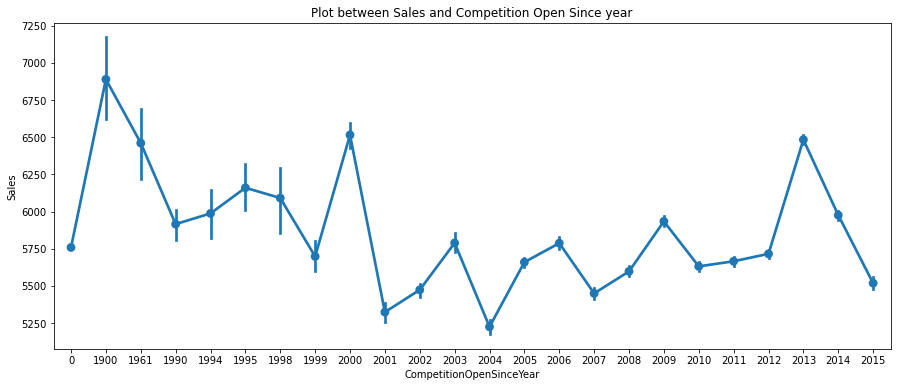

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since year')

From the Plot I can tell that Sales are high during the year 1900, as there are very few store were operated of Rossmann so there is less competition and sales are high. But as year pass on number of stores increased that means competition also increased and this leads to decline in the sales.

Text(0.5, 1.0, 'Plot between Sales and Promo2 Since year')

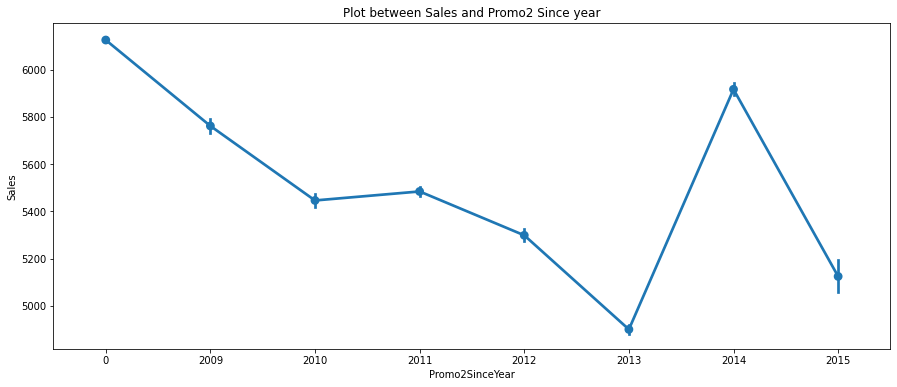

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=final1)
plt.title('Plot between Sales and Promo2 Since year')

Plot between Sales and promo2 since year shows that effect of sales of stores which continue their promotion. this data is available from yaer 2009 to 2015. Promo2 has very good effect on sales but in year 2013 sales be minimum and also in year 2012 and 2015 sales are very low.

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since Month')

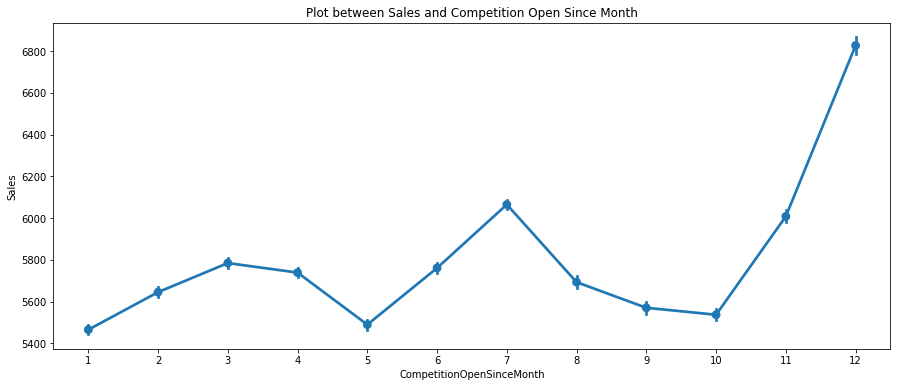

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=final1)
plt.title('Plot between Sales and Competition Open Since Month')

Plot between Competition open since month and Sales explains the sales data in each month of a year. This data shows that sales after month november increases drastically. This is very clear that in December monthdue to Christmas Eve and New year celebration everone is buying. So sales of Rossmann store is very high in December.

Text(0.5, 1.0, 'Plot between Sales and Day of Week')

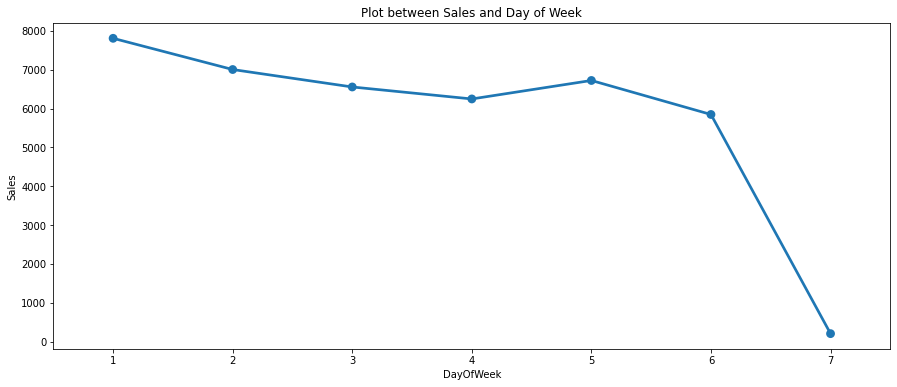

In [ ]:

plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=final1)
plt.title('Plot between Sales and Day of Week')

Plot between Sales and Days of week shows that maximum sales is on Monday and sales gradually decreasing to 6th day of week i.e. on Saturday. It also shows that sales on Sunday is almost near to zero as on sunday maximum stores are closed.

## BoxPlot of sales between Assortment and store type

In [ ]:
#sns.catplot(data= final1, x= 'CompetitionOpenSinceMonth', y= 'Customers', col='StoreType', palette='plasma',
  #                             hue= 'StoreType', row='Promo', color= 'c')

Text(0.5, 1.0, 'Boxplot For Sales Values')

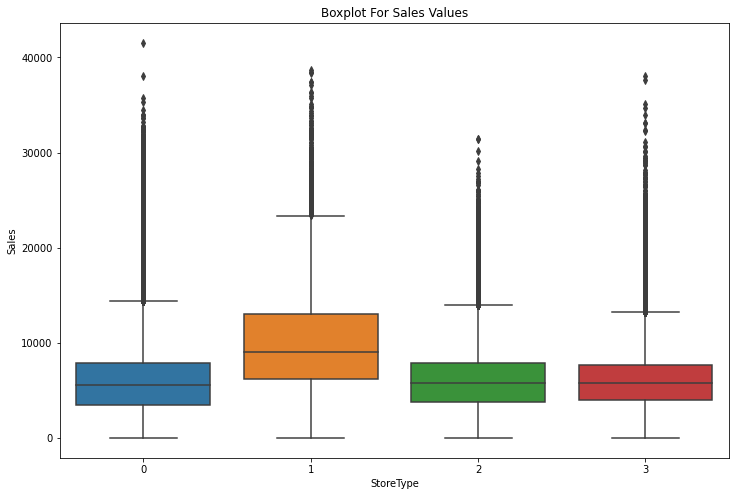

In [ ]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=final1)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment Level')

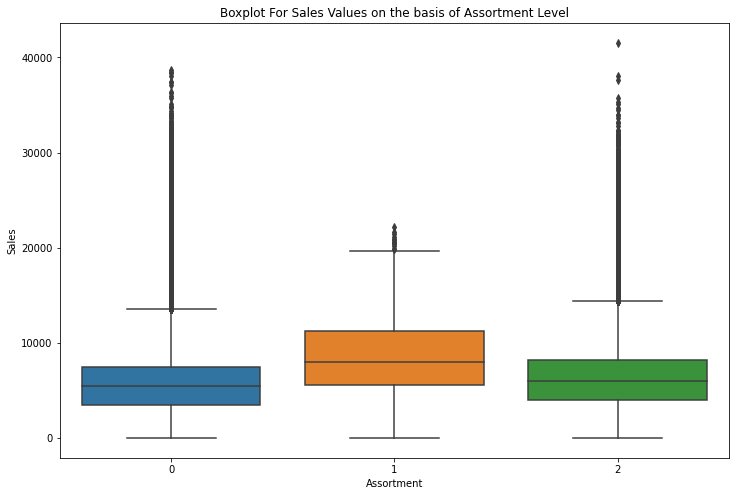

In [ ]:
plt.figure(figsize=(12, 8))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=final1)
plt.title('Boxplot For Sales Values on the basis of Assortment Level')

### Plot between **Dayof Week** and **Open & promo**.

Text(0.5, 1.0, 'Store Daily Open Countplot')

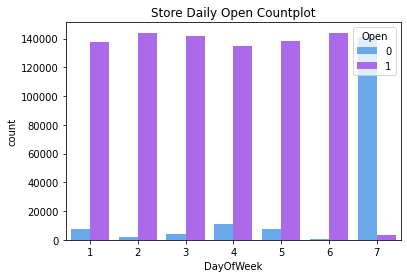

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Open', data= final1, palette='cool')
plt.title('Store Daily Open Countplot')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

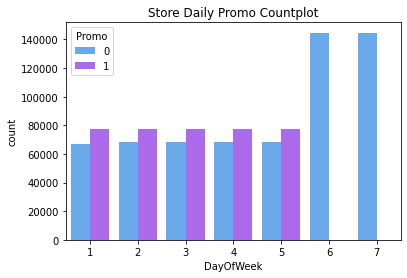

In [ ]:
sns.countplot(x= 'DayOfWeek', hue='Promo', data= final1, palette='cool')
plt.title('Store Daily Promo Countplot')

## Promo

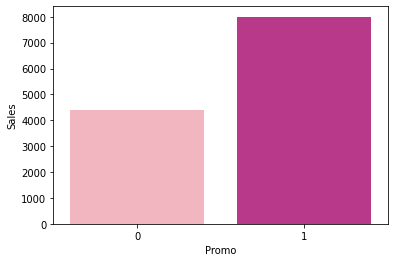

In [ ]:
promo_sales = sns.barplot(x="Promo", y="Sales", data=final1, palette='RdPu')


Barplot between promo and Sales shows the effect of promotion on Sales. Here 0 represents the store which didnt opt for promotion and 1 represents for stores who opt for promotion. Those store who took promotions their sales are high as compared to stores who didnt took promotion.

## StateHoliday and SchoolHoliday

Sales during State Holiday

0 = public holiday, 1 = Easter holiday, 2 = Christmas, 3 = None

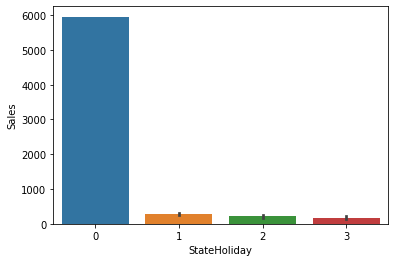

In [ ]:
stateholiday_sales = sns.barplot(x="StateHoliday", y="Sales", data=final1)


Sales during school holiday

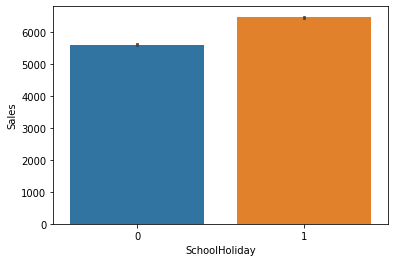

In [ ]:
schoolholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=final1)


We can observe that most of the stores remain closed during State and Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.
Another important thing to note is that the stores which were opened during School holidays had more sales than normal.

## Store Type

In [ ]:
merged_df = pd.merge(rossmann_df, store_new, on='Store', how='left')

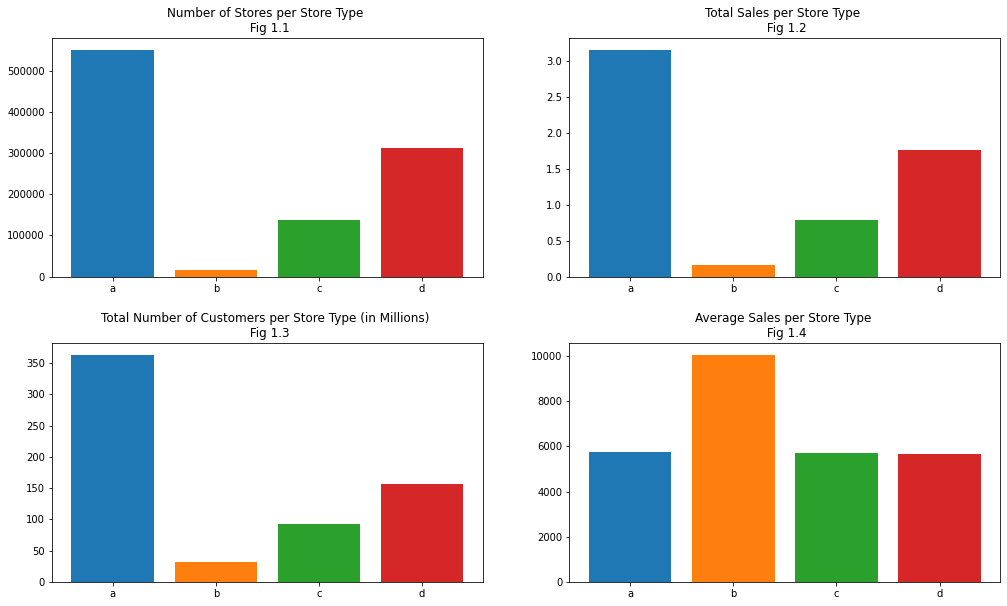

In [ ]:
import itertools
fig, axes = plt.subplots(2, 2,figsize=(17,10) )
palette = itertools.cycle(sns.color_palette(n_colors=4))
plt.subplots_adjust(hspace = 0.28)
axes[0,0].bar(merged_df.groupby(by="StoreType").count().Store.index ,merged_df.groupby(by="StoreType").count().Store,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,0].set_title("Number of Stores per Store Type \n Fig 1.1")
axes[0,1].bar(merged_df.groupby(by="StoreType").sum().Store.index,merged_df.groupby(by="StoreType").sum().Sales/1e9,color=[next(palette),next(palette),next(palette),next(palette)])
axes[0,1].set_title("Total Sales per Store Type \n Fig 1.2")
axes[1,0].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").sum().Customers/1e6,color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,0].set_title("Total Number of Customers per Store Type (in Millions) \n Fig 1.3")
axes[1,1].bar(merged_df.groupby(by="StoreType").sum().Customers.index,merged_df.groupby(by="StoreType").Sales.mean(),color=[next(palette),next(palette),next(palette),next(palette)])
axes[1,1].set_title("Average Sales per Store Type \n Fig 1.4")
plt.show()

From this training set we can see that Storetype A has the highest number of branches,sales and customers from the 4 different storetypes. But this doesn't mean it's the best performing Storetype.

When looking at the average sales and number of customers, we see that actually it is Storetype B who was the highest average Sales and highest average Number of Customers.


### Assortments

As we cited in the description, assortments have three types and each store has a defined type and assortment type:

1. a means basic things
2. b means extra things
3. c means extended things so the highest variety of products.

StoreType  Assortment
a          a             346389
           c             205238
b          a               6594
           b               8294
           c                942
c          a              70878
           c              65962
d          a             113584
           c             199328
Name: Assortment, dtype: int64

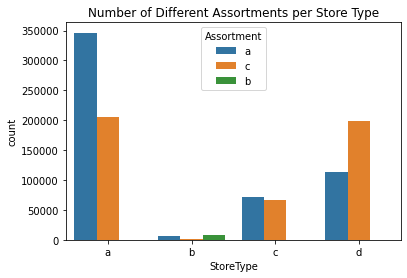

In [ ]:
Storetype_Assortment = sns.countplot(x="StoreType",hue="Assortment",order=["a","b","c","d"], data=merged_df,palette=sns.color_palette(n_colors=3)).set_title("Number of Different Assortments per Store Type")
merged_df.groupby(by=["StoreType","Assortment"]).Assortment.count()

We can clearly see here that most of the stores have either a assortment type or c assortment type.
Interestingly enough StoreType d which has the highest Sales per customer average actually has mostly c assortment type, this is most probably the reason for having this high average in Sales per customer.Having variery in stores always increases the customers spending pattern.

## Conclusions from EDA

1. There are two datasets - **1) Rossmann.csv  & 2) Store.csv**
2. shape of Rossmann dataset = (1017209,8)
   shape of store dataset = (1115, 10)
3. In both dataset **'Store'** column is common. So we do inner join on the basis of column **'Store'**.
4. On looking on datasets we find lots of **Nan** values in **Store dataset**.
5. Try to replace **Nan** values with suitable values. In CompetitionDistance column only 3 Nan values are there. So we replaced it with median. 
6. Now for rest columns(CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, romointerval) there are lots of Nan values and best way to treat this values to replace with 0. 
7. After combining shape of final dataset = (1017209,18)
8. Also there is some columns such as **'StateHoliday', 'SchoolHoliday' & 'Assortment'** which contains object values. So, try to change into int by giving suitable values.

we also did some graphs analysis and conclusions we got are:-
1. From plot sales and competition Open Since Month shows sales go increasing from Novemmber and highest in month December. This may be due to Christmas eve and New Year.
2. From plot Sales and day of week, Sales highest on Monday and start declinig from tuesday to saturday and on Sunday Sales almost near to Zero. This is because on Sunday all stores be closed.
3. Plot between promotion and Sales  shows that promotion helps in increasing Sales. This similar trends also shows with customers.
4. Plot between StateHolidays and sales shows that during Public holiday sales are actually high but for other holidays such as Easter and Christmas sales be very low. This is because During Easter and Christmas stores also closed so sales goes down.


# Feature Engineering

## Correlation

In [ ]:
numeric_features = ['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Promo2SinceWeek',
                    'CompetitionDistance','CompetitionOpenSinceMonth','CompetitionOpenSinceYear',
                    'Promo2','Promo2SinceWeek','Promo2SinceYear']

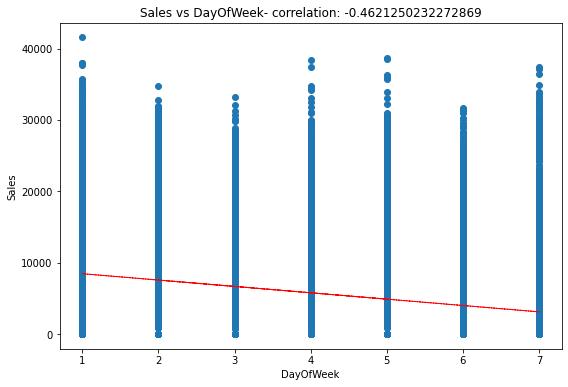

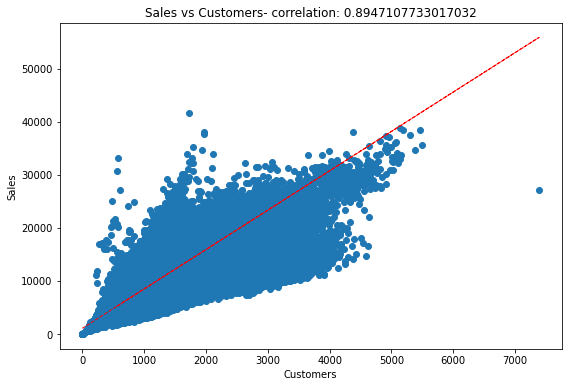

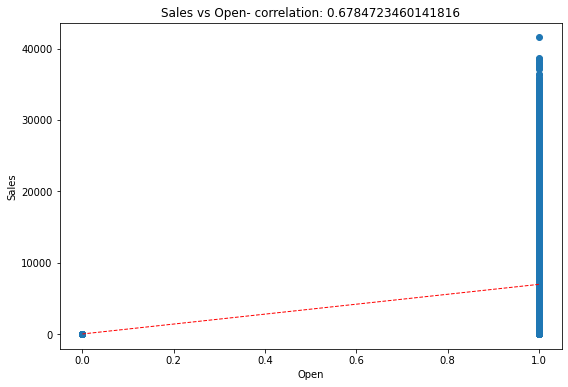

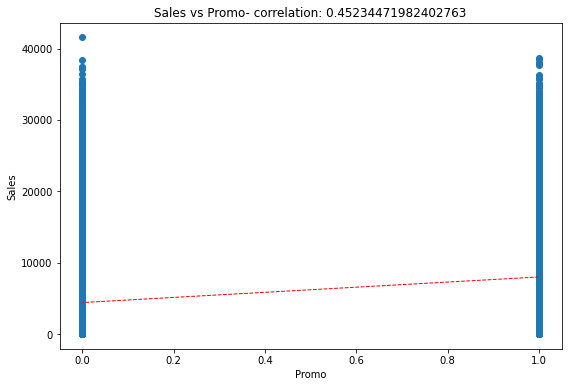

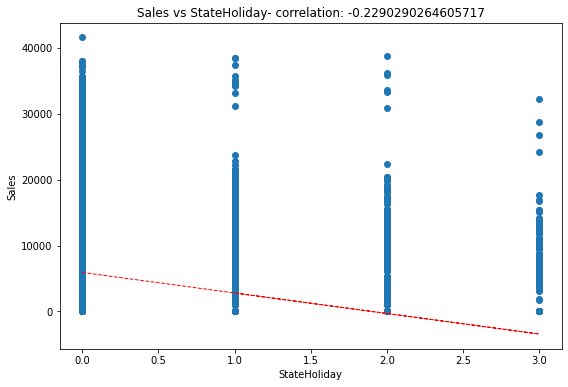

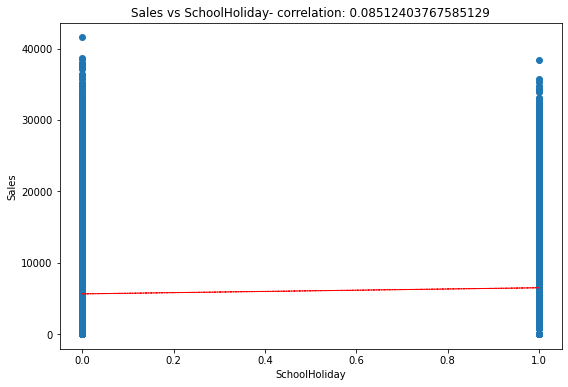

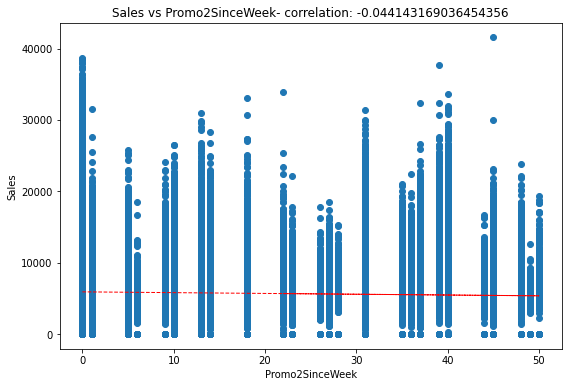

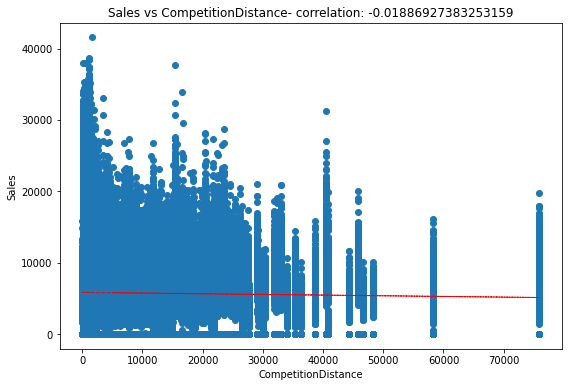

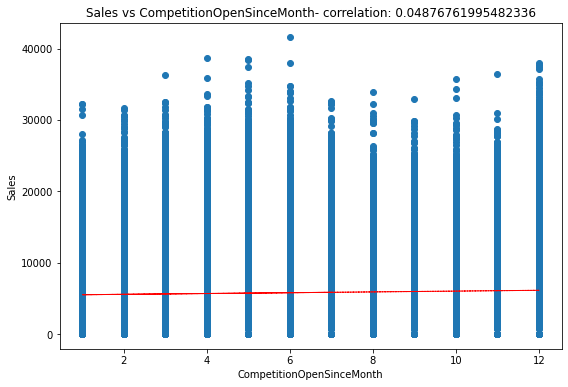

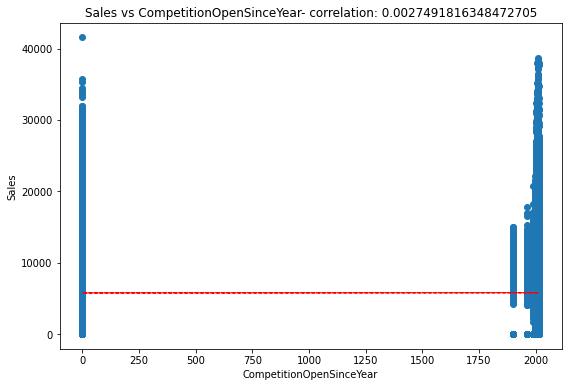

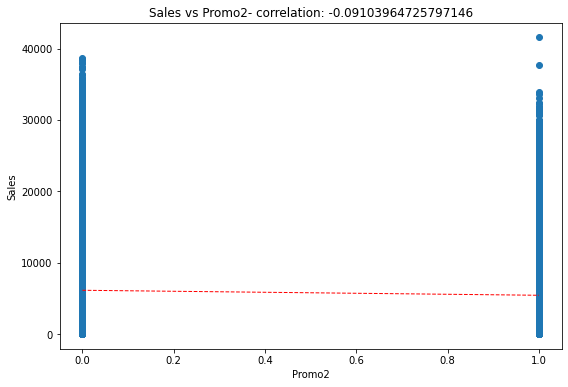

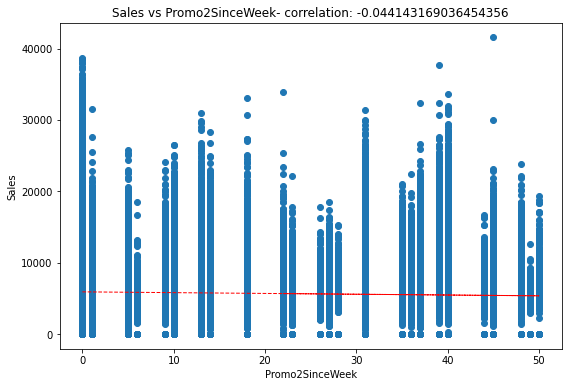

In [ ]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = final1[col]
    label = final1['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(final1[col], final1['Sales'], 1)
    y_hat = np.poly1d(z)(final1[col])

    plt.plot(final1[col], y_hat, "r--", lw=1)

plt.show()

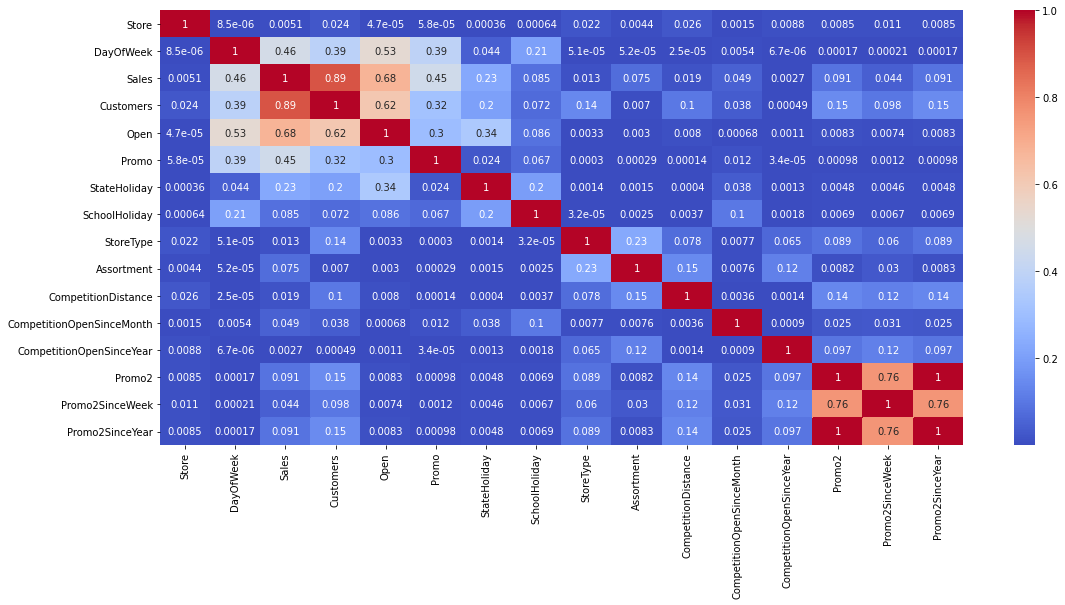

In [ ]:
 ## Correlation
plt.figure(figsize=(18,8))
correlation = final1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

## Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,3.698849e+00
1,DayOfWeek,4.105225e+00
2,Customers,5.237282e+00
3,Open,9.376848e+00
4,Promo,1.917234e+00
5,StateHoliday,1.187994e+00
6,SchoolHoliday,1.330849e+00
7,StoreType,1.940349e+00
8,Assortment,2.045194e+00
9,CompetitionDistance,1.591292e+00


Multicolinearity of columns like 'Promo2SinceYear' is pretty high so we decided to drop it

In [ ]:
calc_vif(final1[[i for i in final1.describe().columns if i not in ['Sales','Promo2SinceYear']]])

,variables,VIF
0,Store,3.696403
1,DayOfWeek,4.104888
2,Customers,5.236788
3,Open,9.375773
4,Promo,1.917192
5,StateHoliday,1.187994
6,SchoolHoliday,1.330832
7,StoreType,1.934515
8,Assortment,2.039582
9,CompetitionDistance,1.584854


Now for each feature VIF values below 10. That's look pretty fine.

## Analysis on Sales - Dependent variable

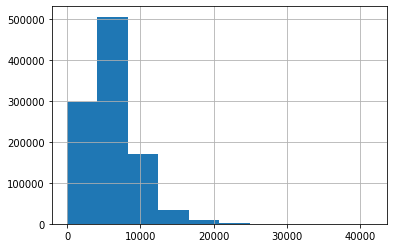

In [ ]:
pd.Series(final1['Sales']).hist()
plt.show()

Now checking for number of sales =0.

In [ ]:
final1[(final1.Open == 0) & (final1.Sales == 0)].count()[0]

172817

 I see that **172817** times store is were temporarily closed for refurbishment. The best solution here is to get rid of closed stores and prevent the models to train on them and get false guidance

In [ ]:
new_df = final1.drop(final1[(final1.Open == 0) & (final1.Sales == 0)].index)

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [ ]:
new_df.shape

(844392, 21)

In [ ]:
new_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


 #                            MODEL TRAINING
I have done training on whole datset as I saw that Sales column contains 172817 rows with 0 sale. SO removing such large number of rows from dataset is not advisable as it would deteriorate my accuracy scores.


In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

***

In [ ]:
final1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


In [ ]:
final1.shape

(1017209, 21)

We define dependent and independent variables and convert them into arrays

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = final1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
# Create the data of independent variables
U = final1[indep_var].values

# Create the dependent variable data
v = final1[dep_var].values

In [ ]:
final1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


**We do a train test split keeping the test size as 0.25**

In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, v, test_size=0.25, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(762906, 17)
(254303, 17)


### LINEAR REGRESSION

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)

In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)

LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7095.27289047, 12613.94867172,  9198.45843735, ...,
        6068.5951561 , 10832.98187485,   216.2357811 ])

In [ ]:
linear_regression.score(U_train, v_train)


0.8678934173546208

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe

,actual,pred
0,7285,7095.272890
1,6221,12613.948672
2,8132,9198.458437
3,20916,11536.444765
4,5472,6601.767031
...,...,...
254298,7554,8075.722109
254299,5646,6797.845156
254300,5580,6068.595156
254301,10702,10832.981875


In [ ]:
sales_mean=final1[dep_var].mean()

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1946201.934139124
RMSE : 1395.063415812745
RMPSE : 0.24161883538507795
R2 : 0.8680171873878139


### DECISION TREE

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)


MSE : 1941000.3210334072
RMSE : 1393.1978757640306
RMPSE : 0.24129573207032864
R2 : 0.8683699377965819


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe

,actual,pred
0,7285,6344.743423
1,6221,10406.410259
2,8132,8930.765753
3,20916,11626.599034
4,5472,5390.864748
...,...,...
254298,7554,7569.630968
254299,5646,5533.817991
254300,5580,6741.976364
254301,10702,10406.410259


### RANDOM FOREST

In [ ]:
random_forest=RandomForestRegressor(n_estimators =500,max_depth=8)
random_forest.fit(U_train, v_train)
v_pred_rf=random_forest.predict(U_test)
MSE  = mean_squared_error(v_test, v_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rf)
print("R2 :" ,r2)

MSE : 1116891.5574531027
RMSE : 1056.830902960877
RMPSE : 0.1830384547956939
R2 : 0.9242573514342587


In [ ]:
rf_Dataframe = pd.DataFrame(zip(v_test, v_pred_rf), columns = ['actual', 'pred'])
rf_Dataframe

,actual,pred
0,7285,7005.668572
1,6221,10812.973015
2,8132,9260.425673
3,20916,13741.560912
4,5472,6051.594946
...,...,...
254298,7554,7712.974887
254299,5646,6519.966211
254300,5580,6792.919785
254301,10702,10569.888617


### Lasso

In [ ]:
lasso = Lasso(alpha = 2.0)

In [ ]:
lasso.fit(U_train, v_train)

Lasso(alpha=2.0)

In [ ]:
v_pred_lasso = lasso.predict(U_test)

In [ ]:
lasso.score(U_train, v_train)

0.8678895363829434

In [ ]:
pd.DataFrame(zip(v_test, v_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,7285,7103.753000
1,6221,12607.264286
2,8132,9190.009579
3,20916,11510.976549
4,5472,6592.567580
...,...,...
254298,7554,8070.157768
254299,5646,6784.494505
254300,5580,6053.693320
254301,10702,10828.164289


### Ridge

In [ ]:
ridge = Ridge(alpha = 0.5)

In [ ]:
ridge.fit(U_train, v_train)

Ridge(alpha=0.5)

In [ ]:
v_pred_rid=ridge.predict(U_test)

In [ ]:
ridge.score(U_test, v_test)

0.8680172162359526

In [ ]:
MSE  = mean_squared_error(v_test, v_pred_rid)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_rid)
print("R2 :" ,r2)

MSE : 1946201.508748102
RMSE : 1395.0632633497673
RMPSE : 0.24161880897916213
R2 : 0.8680172162359526


# Conclusion from Model Training

I saw that Sales column contains 172817 rows with 0 sale.

I have done training on whole datset as I saw that Sales column contains 172817 rows with 0 sale. SO removing such large number of rows from dataset is not advisable as it would deteriorate my accuracy scores.I  used various algorithms and got accuracy score around 74%.

I got MY best rmpse score from Random Forest model,we tried taking an optimum parameter so that MY model doesnt overfit.

## CONCLUSION FROM EDA



1)I observe that most of the stores remain closed during State Holidays. But it is interesting to note that the number of stores opened during School Holidays were more than that were opened during State Holidays.1)From plot sales and competition Open Since Month shows sales go increasing from November and highest in month December.   

2)GRAPH plot Sales and day of week, Sales highest on Monday and start declining from Tuesday to Saturday and on Sunday Sales almost near to Zero.  

3)GRAPH between Promotion and Sales shows that promotion helps in increasing Sales.   

4)Type of Store plays an important role in opening pattern of stores. 

5)All Type ‘b’ stores never closed except for refurbishment or other reason.  

6)All Type ‘b’ stores have comparatively higher sales and it mostly constant with peaks appears on weekends.   

7)sortment Level ‘b’ is only offered at Store Type ‘b’.  


